**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( B )

---


Engenheiro(a) do conhecimento:
* William Teixeira Pires Junior

---

# Solução para o Problema

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy

Como visto na análise dos dados, a correlação entre os atributos é muito baixa ou inexistente. Por esse motivo optamos por utilizar uma ``Naive Bayes Network``, que presume a independência entre os atributos. De forma mais especifica, experimentaremos 2 variações do algoritmo `Naive bayes`:

- Gaussian Naive Bayes
- Categorical Naive Bayes

A principal diferença entre eles é a forma como a probabilidade dos eventos são calculadas.

## Primeiro Algoritmo: Gaussian Naive Bayes

A técnica `Gaussian Naive Bayes` utiliza a distribuição gaussiana para calcular o quão provável um evento é de acontecer.

In [21]:
# Importamos os dados
df = pandas.read_csv('reduced_df.csv')

# Dividimos o atributo alvo dos demais atributos
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis=1)

# Separamos os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Criamos o modelo, treinamos a rede e testamos
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Avaliação dos resultados
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        62
           1       0.47      0.29      0.36        28

    accuracy                           0.68        90
   macro avg       0.60      0.57      0.57        90
weighted avg       0.65      0.68      0.65        90



Vamos alterar o parâmetro `random_state`, que altera o padrão de aleatoriedade na escolha de elementos para a base de treino, e ver o que acontece:

In [22]:
# Importamos os dados
df = pandas.read_csv('reduced_df.csv')

# Dividimos o atributo alvo dos demais atributos
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis=1)

# Separamos os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Criamos o modelo, treinamos a rede e testamos
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Avaliação dos resultados
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        61
           1       0.58      0.62      0.60        29

    accuracy                           0.73        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.74      0.73      0.74        90



Como visto, a depender dos elementos no grupo de teste, a acurácia do modelo muda. Vamos então fazer um teste mais completo:

- Variando o tamanho da base de teste de 10% a 70% em passos de 10%
- Variando o parâmetro de aleatoriedade de 0 a 1000

O objetivo é verificar o quanto as soluções podem variar dependendo da escolha dos dados de treino.

In [23]:
# Importamos os dados
df = pandas.read_csv('reduced_df.csv')

# Iremos armazenar as soluções em um dicionário
# Agrupados por tamanho da base de teste
solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        # Dividimos o atributo alvo dos demais atributos
        y = df['DEATH_EVENT']
        X = df.drop('DEATH_EVENT', axis=1)

        # Separamos os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        # Criamos o modelo, treinamos a rede e testamos
        gnb = GaussianNB()
        y_pred = gnb.fit(X_train, y_train).predict(X_test)

        # Salvamos no dicionário o valor de estado randômico 
        # e acurácia obtida pela solução
        accuracy = classification_report(y_test,y_pred,output_dict=True,zero_division=0)['accuracy']
        solutions[t_size].append([r_state, accuracy])

Podemos então ordenar a lista de soluções e verificar quais são as maiores e menores acurácias:

In [24]:
# Ordenamos as soluções pela acurácia
solutions[0.3].sort(key=lambda x: x[1], reverse=True)

# 5 soluções com maior acurácia
print(solutions[0.3][0])
print(solutions[0.3][1])
print(solutions[0.3][2])
print(solutions[0.3][3])
print(solutions[0.3][4])

print('...')

# 5 soluções com menor acurácia
print(solutions[0.3][995])
print(solutions[0.3][996])
print(solutions[0.3][997])
print(solutions[0.3][998])
print(solutions[0.3][999])


[217, 0.8666666666666667]
[24, 0.8444444444444444]
[760, 0.8444444444444444]
[348, 0.8333333333333334]
[492, 0.8333333333333334]
...
[628, 0.6]
[830, 0.6]
[734, 0.5888888888888889]
[860, 0.5888888888888889]
[750, 0.5666666666666667]


Vamos então separar a acurácia máxima e mínima para cada tamanho de base de teste.

In [25]:
# listas para armazenar maior e menor acurácia para cada tamanho de base de teste
max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    # Ordenamos as soluções pela acurácia
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)
    print("Max accuracy for test_size=",t_size," was with random_state=",solutions[t_size][0][0],
          " and achieved accuracy=",solutions[t_size][0][1])
    print("Min accuracy for test_size=",t_size," was with random_state=",solutions[t_size][999][0],
          " and achieved accuracy=",solutions[t_size][999][1])
    print("-----------------------------------------------------")

    # Adicionamos a maior e a menor acurácia para o atual tamanho de base de teste
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][999][1], decimals=2))

Max accuracy for test_size= 0.1  was with random_state= 250  and achieved accuracy= 0.9333333333333333
Min accuracy for test_size= 0.1  was with random_state= 610  and achieved accuracy= 0.43333333333333335
-----------------------------------------------------
Max accuracy for test_size= 0.2  was with random_state= 24  and achieved accuracy= 0.9
Min accuracy for test_size= 0.2  was with random_state= 830  and achieved accuracy= 0.5833333333333334
-----------------------------------------------------
Max accuracy for test_size= 0.3  was with random_state= 217  and achieved accuracy= 0.8666666666666667
Min accuracy for test_size= 0.3  was with random_state= 750  and achieved accuracy= 0.5666666666666667
-----------------------------------------------------
Max accuracy for test_size= 0.4  was with random_state= 180  and achieved accuracy= 0.8333333333333334
Min accuracy for test_size= 0.4  was with random_state= 750  and achieved accuracy= 0.5916666666666667
-----------------------------

Por fim, plotamos o resultado como gráfico de barras:

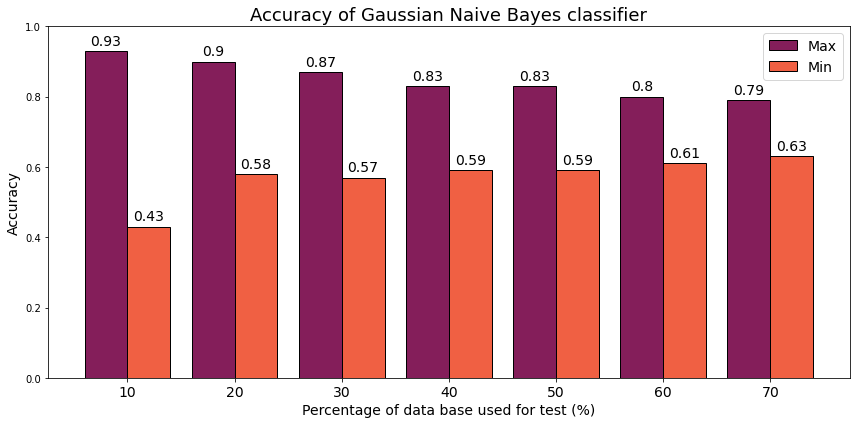

In [26]:
labels = ["10", "20", "30", "40", "50", "60", "70"]
x = numpy.arange(len(labels))  # Ordem das labels
width = 0.40  # largura das barras
colors = seaborn.color_palette('rocket', n_colors=2)

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Adiciona texto às labels, titulo, tick labels personalizadas, etc.
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Percentage of data base used for test (%)', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=14)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Accuracy of Gaussian Naive Bayes classifier', fontsize=18)

fig.tight_layout()

plt.show()

## Utilizando Dados Continuos na GaussianNB

O algoritmo `Gaussian Naive Bayes` permite entrada de dados não discretizados, então faremos um teste com os dados sem discretização para comparação.

In [ ]:
df = pandas.read_csv('heart_failure_clinical_records_dataset.csv')
df.drop(['time'], axis=1, inplace=True)

solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        y = df['DEATH_EVENT']
        X = df.drop('DEATH_EVENT', axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        gnb = GaussianNB()
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        accuracy = classification_report(y_test,y_pred,output_dict=True,zero_division=0)['accuracy']
        solutions[t_size].append([r_state, accuracy])

In [ ]:
max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)
    last = len(solutions[t_size]) - 1
    print("Qunatity of solutions: ", last+1)
    print("Max accuracy for test_size=",t_size," was with random_state=",solutions[t_size][0][0],
          " and achieved accuracy=",solutions[t_size][0][1])
    print("Min accuracy for test_size=",t_size," was with random_state=",solutions[t_size][last][0],
          " and achieved accuracy=",solutions[t_size][last][1])
    print("-----------------------------------------------------")
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][last][1], decimals=2))

Qunatity of solutions:  1000
Max accuracy for test_size= 0.1  was with random_state= 7  and achieved accuracy= 0.9333333333333333
Min accuracy for test_size= 0.1  was with random_state= 107  and achieved accuracy= 0.4
-----------------------------------------------------
Qunatity of solutions:  1000
Max accuracy for test_size= 0.2  was with random_state= 213  and achieved accuracy= 0.8833333333333333
Min accuracy for test_size= 0.2  was with random_state= 803  and achieved accuracy= 0.55
-----------------------------------------------------
Qunatity of solutions:  1000
Max accuracy for test_size= 0.3  was with random_state= 801  and achieved accuracy= 0.8444444444444444
Min accuracy for test_size= 0.3  was with random_state= 782  and achieved accuracy= 0.5777777777777777
-----------------------------------------------------
Qunatity of solutions:  1000
Max accuracy for test_size= 0.4  was with random_state= 801  and achieved accuracy= 0.85
Min accuracy for test_size= 0.4  was with rand

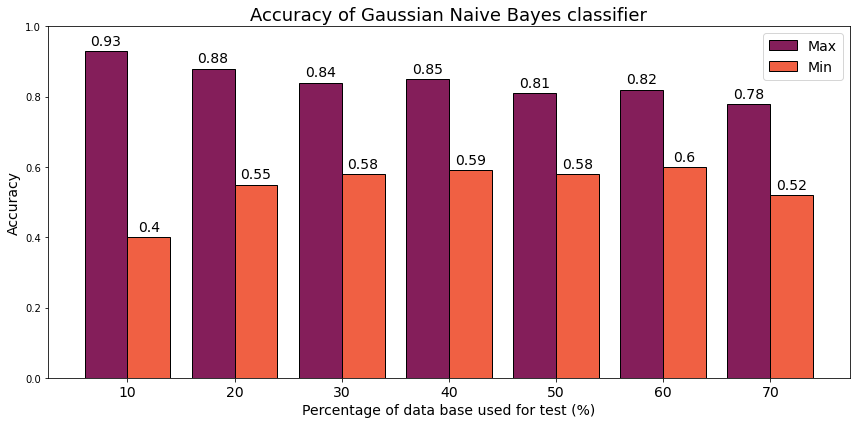

In [81]:
labels = ["10", "20", "30", "40", "50", "60", "70"]
x = numpy.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars
colors = seaborn.color_palette('rocket', n_colors=2)

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Percentage of data base used for test (%)', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=14)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Accuracy of Gaussian Naive Bayes classifier', fontsize=18)

fig.tight_layout()

plt.show()

Podemos ver que o resultado levemente pior do que com a utilização da base de dados completamente discretizada.

## Segundo Algoritmo: Categorical Naive Bayes

A `Categorical Naive Bayes` utiliza a distribuição categórica juntamente com `estimativa-m` para identificar a probabilidade de ocorrência dos eventos. Executaremos o mesmo teste aplicado anteriormente.

In [27]:
# Importamos os dados
df = pandas.read_csv('reduced_df.csv')

# Iremos armazenar as soluções em um dicionário
# Agrupados por tamanho da base de teste
solutions = dict()
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    solutions[t_size] = list()
    for r_state in range(0, 1000):
        # Dividimos o atributo alvo dos demais atributos
        y = df['DEATH_EVENT']
        X = df.drop('DEATH_EVENT', axis=1)

        # Separamos os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

        # Criamos o modelo, treinamos a rede e testamos
        cnb = CategoricalNB()
        try:
            y_pred = cnb.fit(X_train, y_train).predict(X_test)
        except IndexError:
            continue

        # Salvamos no dicionário o valor de estado randômico
        # e acurácia obtida pela solução
        accuracy = classification_report(y_test,y_pred,output_dict=True)['accuracy']
        solutions[t_size].append([r_state, accuracy])

In [28]:
# listas para armazenar maior e menor acurácia para cada tamanho de base de teste
max_series = []
min_series = []
for t_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    # Ordenamos as soluções pela acurácia
    solutions[t_size].sort(key=lambda x: x[1], reverse=True)
    last = len(solutions[t_size]) - 1
    print("Max accuracy for test_size=",t_size," was with random_state=",solutions[t_size][0][0],
          " and achieved accuracy=",solutions[t_size][0][1])
    print("Min accuracy for test_size=",t_size," was with random_state=",solutions[t_size][last][0],
          " and achieved accuracy=",solutions[t_size][last][1])
    print("-----------------------------------------------------")

    # Adicionamos a maior e a menor acurácia para o atual tamanho de base de teste
    max_series.append(numpy.round(solutions[t_size][0][1], decimals=2))
    min_series.append(numpy.round(solutions[t_size][last][1], decimals=2))

Max accuracy for test_size= 0.1  was with random_state= 7  and achieved accuracy= 0.9333333333333333
Min accuracy for test_size= 0.1  was with random_state= 608  and achieved accuracy= 0.5
-----------------------------------------------------
Max accuracy for test_size= 0.2  was with random_state= 997  and achieved accuracy= 0.8666666666666667
Min accuracy for test_size= 0.2  was with random_state= 812  and achieved accuracy= 0.5833333333333334
-----------------------------------------------------
Max accuracy for test_size= 0.3  was with random_state= 7  and achieved accuracy= 0.8444444444444444
Min accuracy for test_size= 0.3  was with random_state= 734  and achieved accuracy= 0.5888888888888889
-----------------------------------------------------
Max accuracy for test_size= 0.4  was with random_state= 132  and achieved accuracy= 0.825
Min accuracy for test_size= 0.4  was with random_state= 390  and achieved accuracy= 0.625
-----------------------------------------------------
Max a

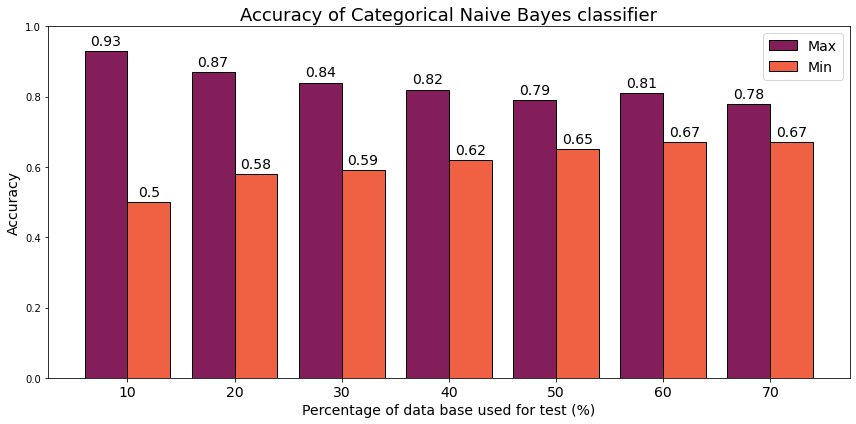

In [29]:
labels = ["10", "20", "30", "40", "50", "60", "70"]
x = numpy.arange(len(labels))  # Ordem das labels
width = 0.40  # largura das barras
colors = seaborn.color_palette('rocket', n_colors=2)

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, max_series, width, label='Max', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, min_series, width, label='Min', color=colors[1], edgecolor='black')

# Adiciona texto às labels, titulo, tick labels personalizadas, etc.
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Percentage of data base used for test (%)', fontsize=14)
ax.set_xticks(x, labels, fontsize=14)
ax.set_yticks([.0, .2, .4, .6, .8, 1], fontsize=14)
ax.legend(fontsize=14)

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_title('Accuracy of Categorical Naive Bayes classifier', fontsize=18)

fig.tight_layout()

plt.show()

## Investigando o Motivo da Variação

Percebemos que existe uma grande variação na acurácia da `rede bayesiana` a depender dos dados que escolhemos para a base de treino. Para tentar entender melhor o motivo desse fenômeno, vamos as seguintes avaliações entre a solução com maior e menor acurácia para o caso onde `30%` dos dados estão na base de treino:

- Matriz de confusão
- Matriz de correlação do conjunto de teste contendo o valor predito
- Matriz de correlação do conjunto de treino

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        59
           1       0.88      0.71      0.79        31

    accuracy                           0.87        90
   macro avg       0.87      0.83      0.84        90
weighted avg       0.87      0.87      0.86        90



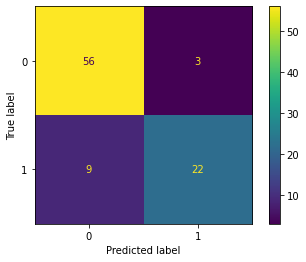

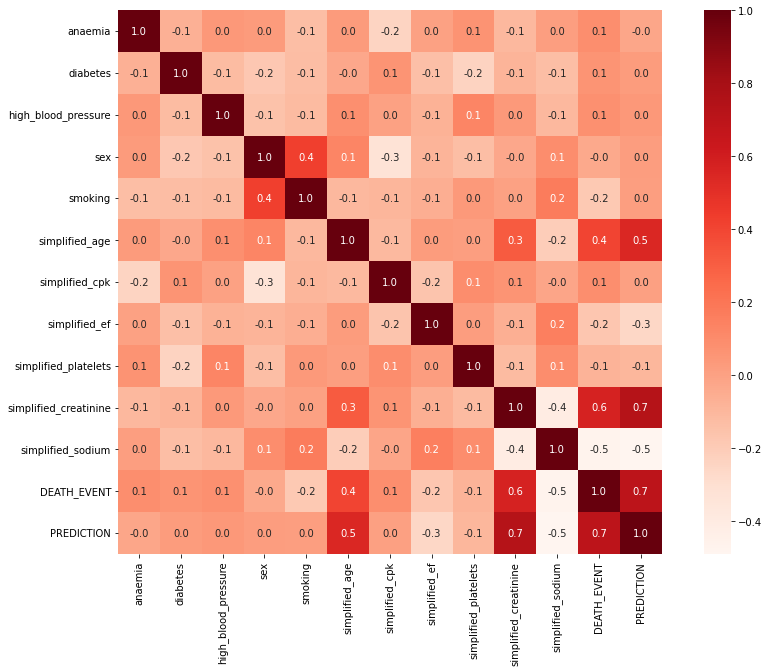

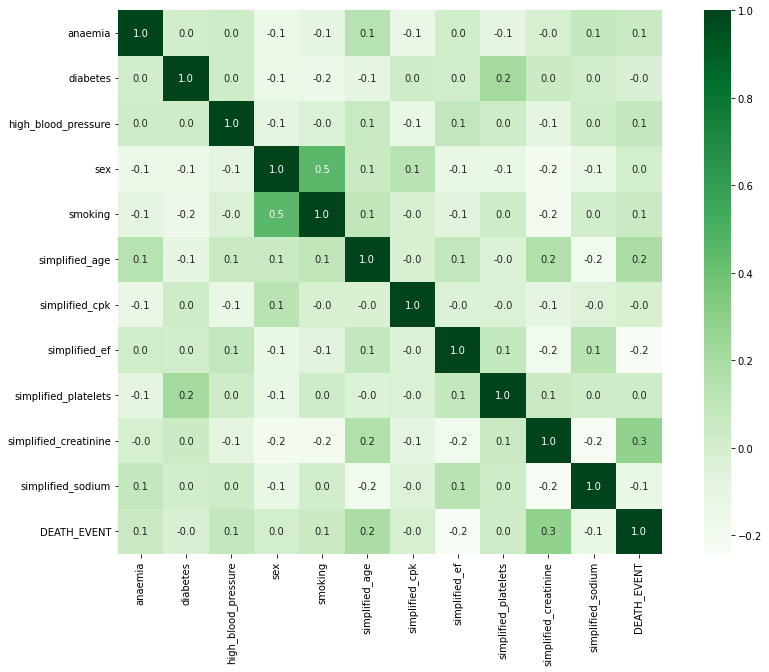

In [75]:
# Importamos os dados
df = pandas.read_csv('reduced_df.csv')

# Dividimos o atributo alvo dos demais atributos
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis=1)

# Separamos os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=217)

# Criamos o modelo, treinamos a rede e testamos
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

X_test['DEATH_EVENT'] = y_test
X_test['PREDICTION'] = y_pred
X_train['DEATH_EVENT'] = y_train

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

plt.figure(figsize=(15,10))
correlated=X_test.corr()
seaborn.heatmap(correlated,annot=True,cbar=True,square=True,cmap='Reds',annot_kws={'size':10},fmt='.1f')

plt.figure(figsize=(15,10))
correlated=X_train.corr()
seaborn.heatmap(correlated,annot=True,cbar=True,square=True,cmap='Greens',annot_kws={'size':10},fmt='.1f')

# Avaliação dos resultados
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        59
           1       0.38      0.42      0.40        31

    accuracy                           0.57        90
   macro avg       0.53      0.53      0.53        90
weighted avg       0.58      0.57      0.57        90



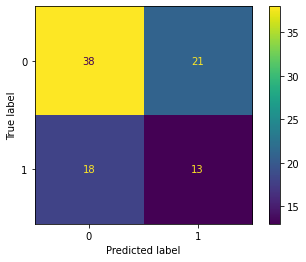

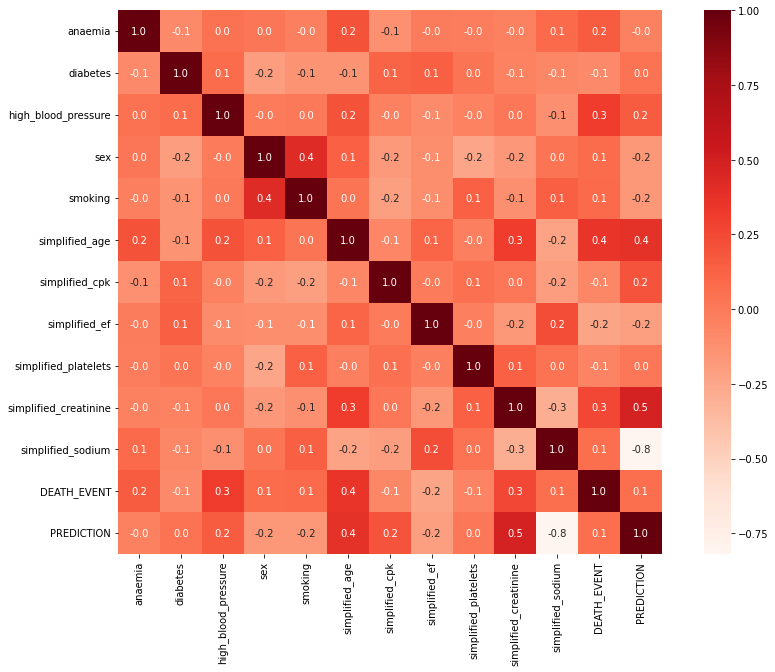

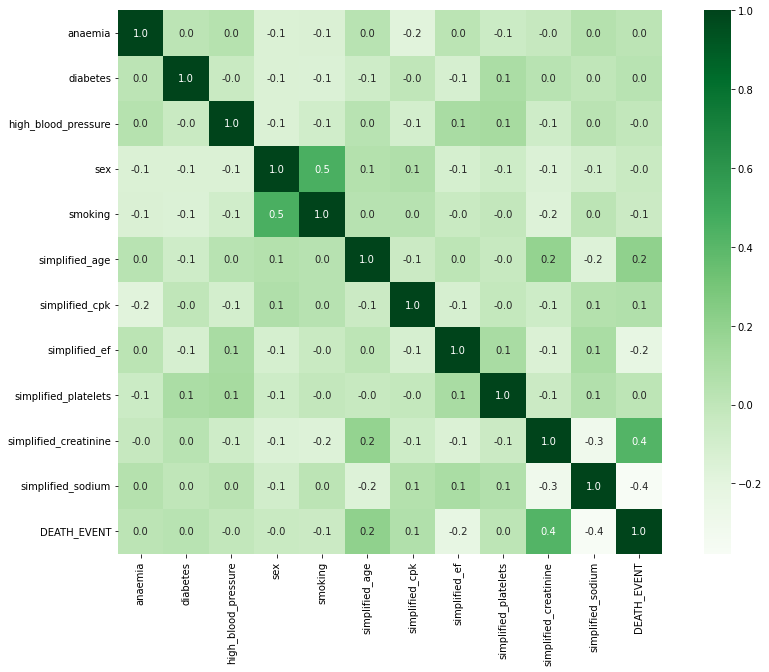

In [76]:
# Importamos os dados
df = pandas.read_csv('reduced_df.csv')

# Dividimos o atributo alvo dos demais atributos
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis=1)

# Separamos os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=750)

# Criamos o modelo, treinamos a rede e testamos
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

X_test['DEATH_EVENT'] = y_test
X_test['PREDICTION'] = y_pred
X_train['DEATH_EVENT'] = y_train

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

plt.figure(figsize=(15,10))
correlated=X_test.corr()
seaborn.heatmap(correlated,annot=True,cbar=True,square=True,cmap='Reds',annot_kws={'size':10},fmt='.1f')

plt.figure(figsize=(15,10))
correlated=X_train.corr()
seaborn.heatmap(correlated,annot=True,cbar=True,square=True,cmap='Greens',annot_kws={'size':10},fmt='.1f')


# Avaliação dos resultados
print(classification_report(y_test,y_pred))

Avaliando a matriz de confusão, vemos que a quantidade de eventos positivos e negativos são equivalentes entre os exemplos com melhor e pior acurácia (ou seja, 39 casos de morte e 51 casos de não morte), então o problema não está na distribuição de dados no conjunto de testes.

Podemos ver que no exemplo com pior acurácia, as correlações para o atributo alvo na base de teste são muito diferentes das correlações no conjunto de treino enquanto no exemplo com melhor acurácia elas são mais parecidas, o que pode nos dar um indício da causa da variação.

## Conclusão

Não iremos considerar os exemplo onde utilizamos uma divisão de `20%` ou menos dos dados no conjunto de teste, pois representam uma quantidade muito baixa de valores:

- `20%` ~ 60 entradas
- `10%` ~ 30 entradas

Tendo isso definido, a acurácia mais alto que conseguimos foi de `87%`, o que por si só já é uma precisão muito baixa. Porém temos ainda a questão da variação muito grande da correlação do atributo alvo com os outros, a depender de como dividimos a base de dados, o que nos leva a concluir que o tamanho da base de dados é muito pequena e os atributos presentes não são suficientes para inferir de forma adequada o atributo alvo, o que torna a acurácia alcançada nada confiável.